In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of th
e current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Read dataset and view some info 

In [2]:
df_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Handling missing value

In [5]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
df_train.drop(columns = ["Id","Alley", "MasVnrType", "FireplaceQu", "PoolQC","Fence" ,"MiscFeature"] , inplace = True)

In [7]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df_train.duplicated().sum()

0

In [9]:
# determine numerical_data 
numerical_columns = df_train.select_dtypes(include=['number'])

## Determine and Handling outliers

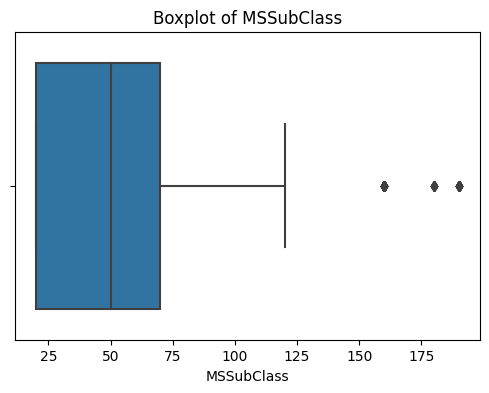

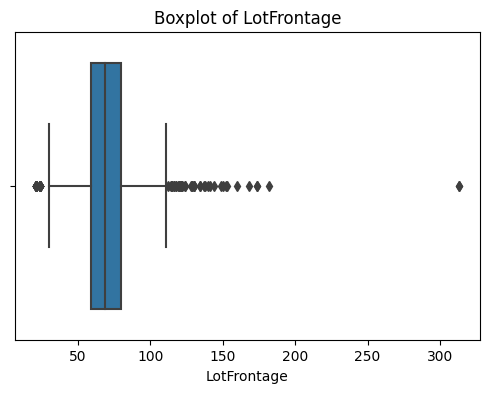

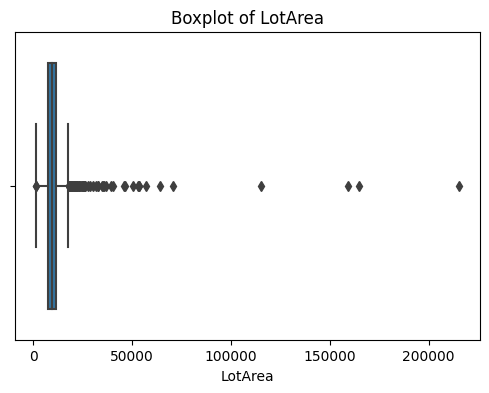

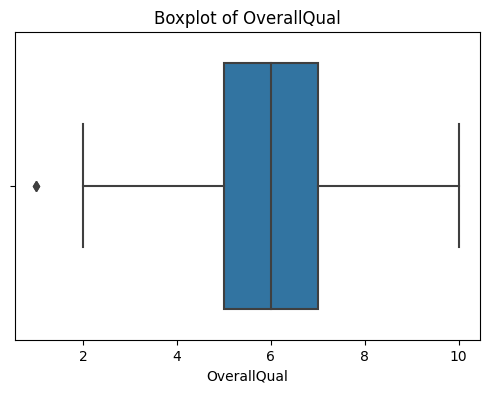

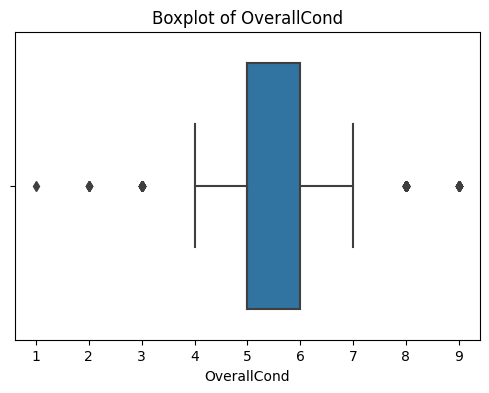

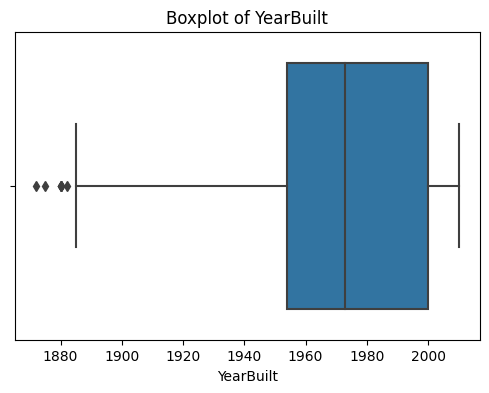

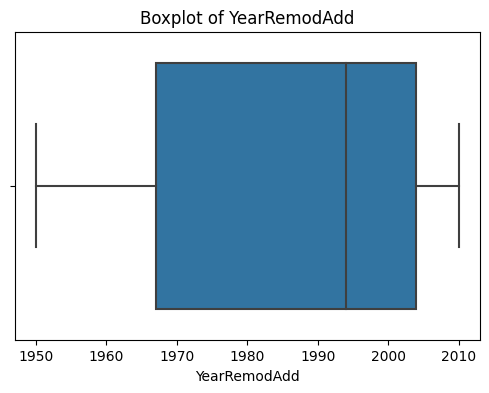

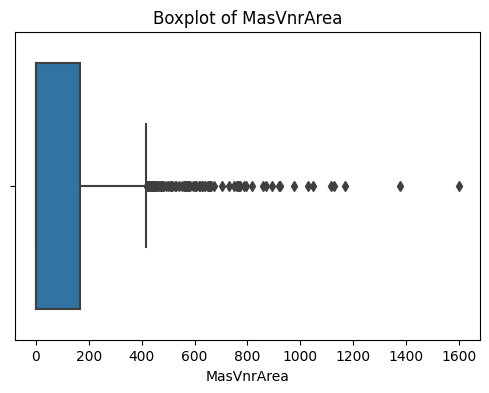

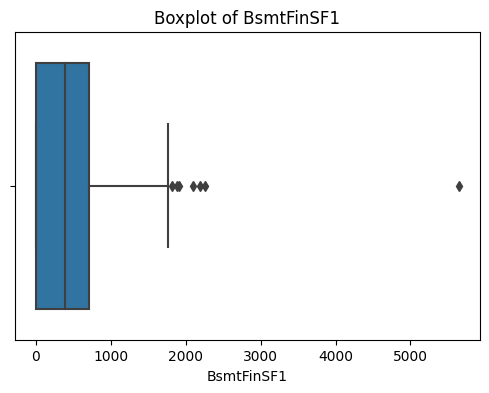

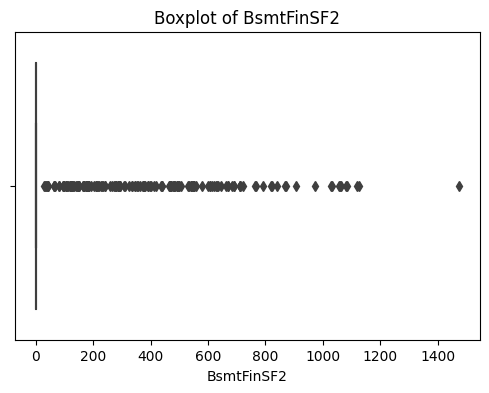

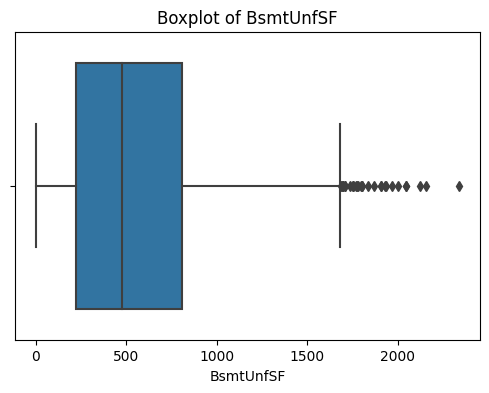

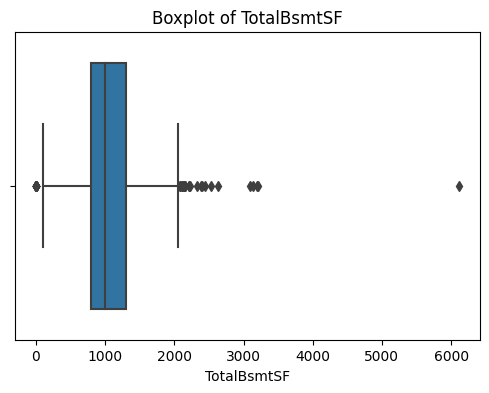

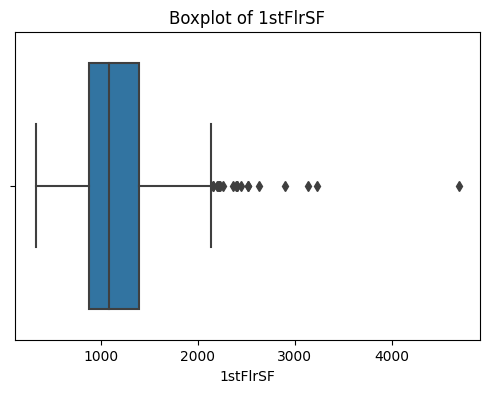

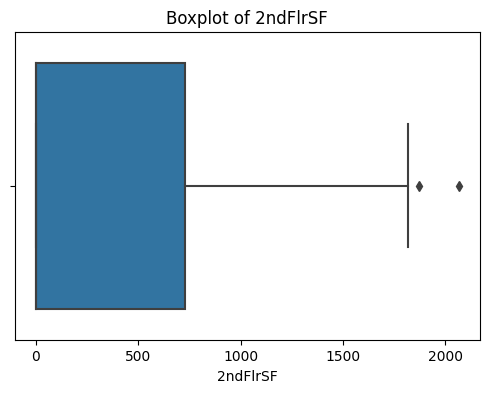

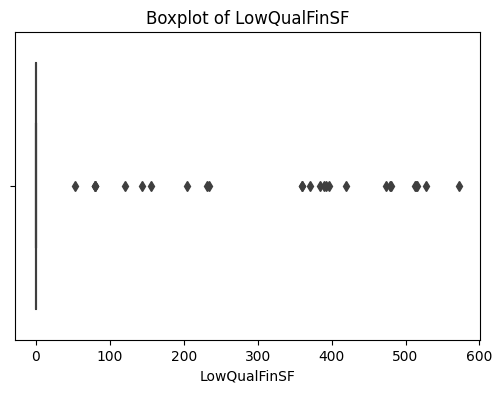

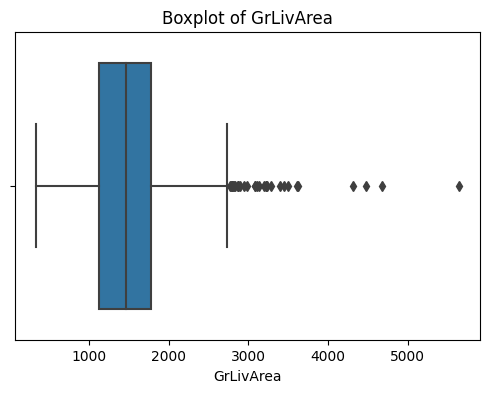

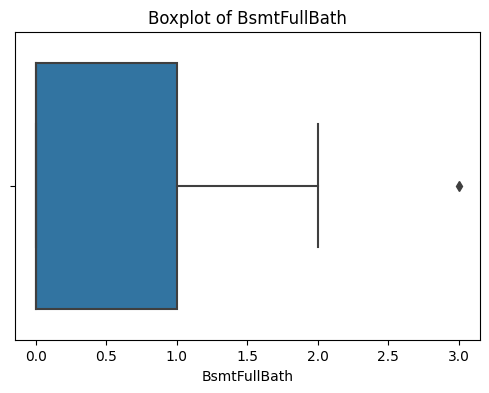

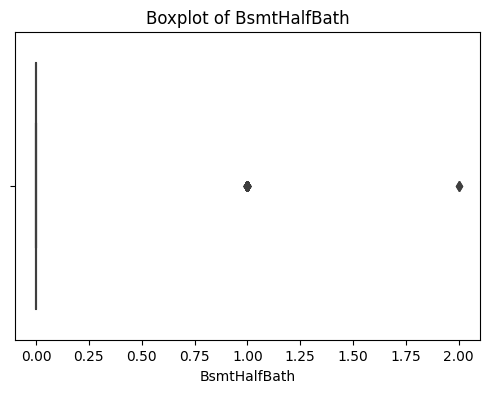

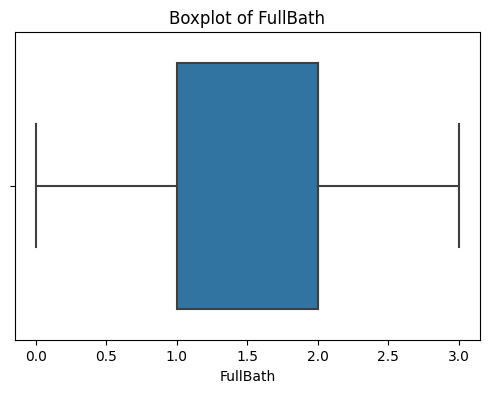

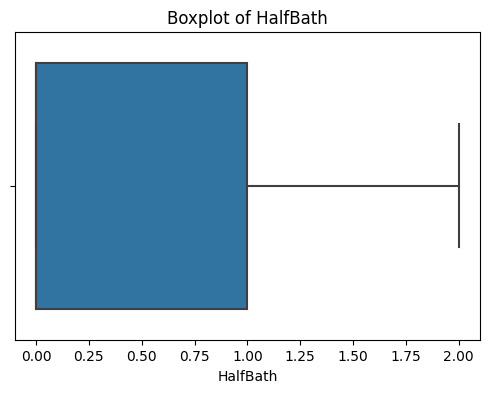

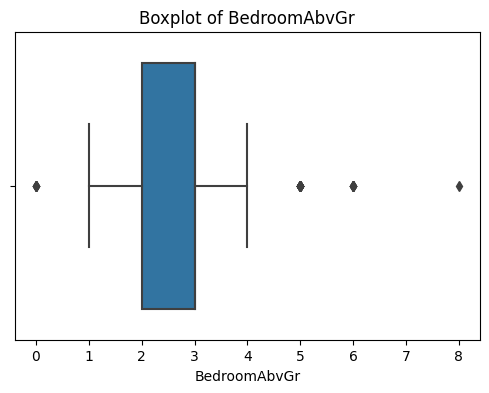

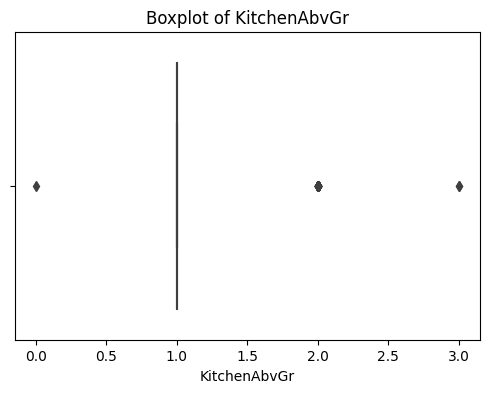

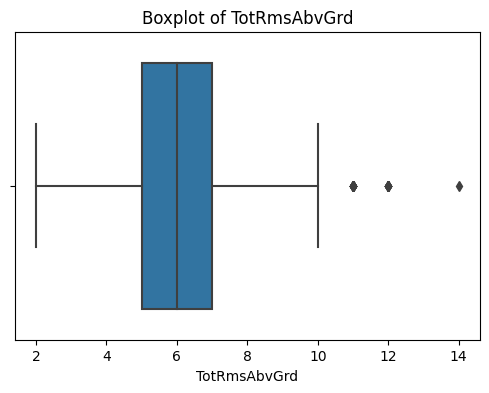

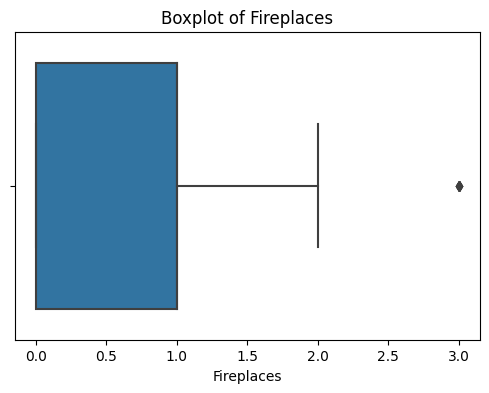

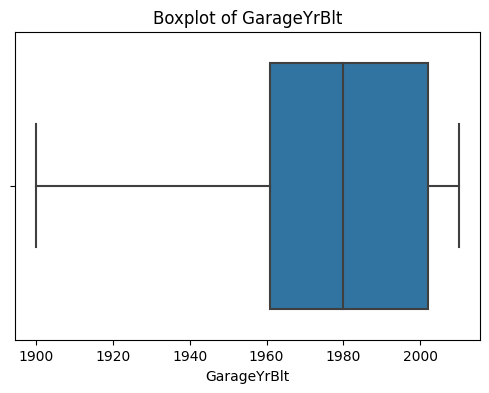

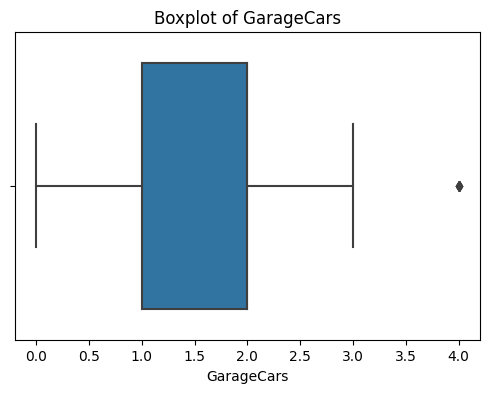

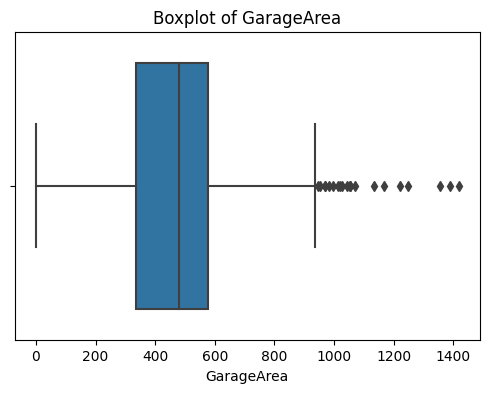

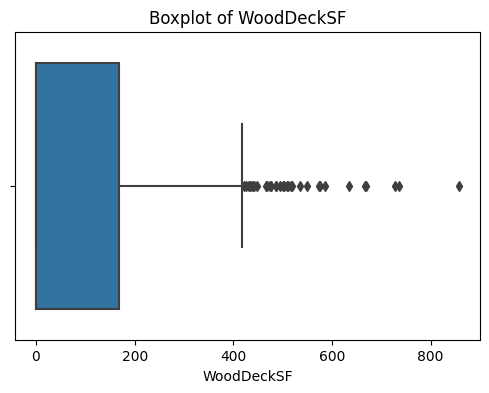

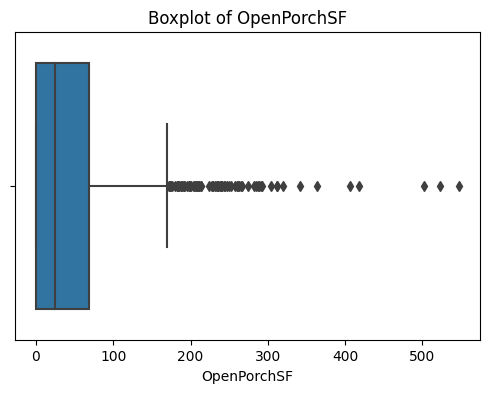

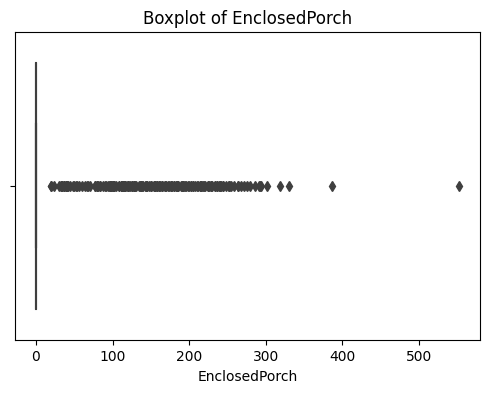

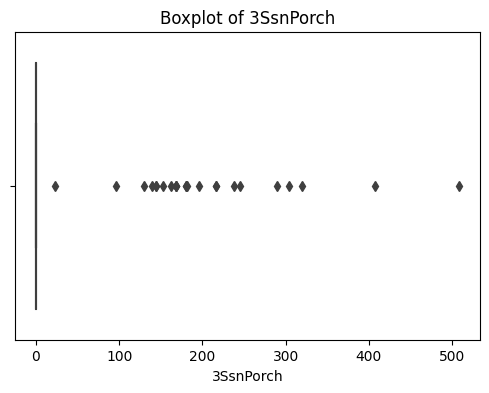

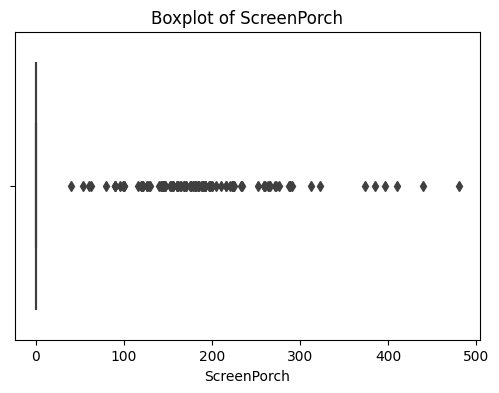

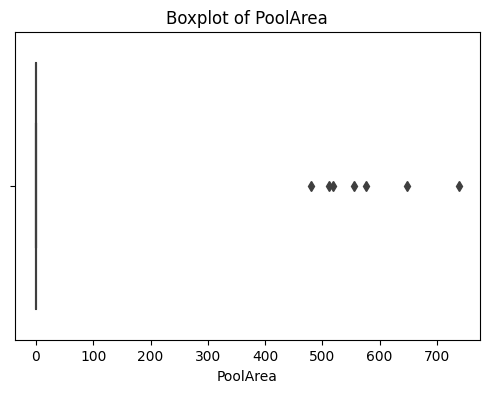

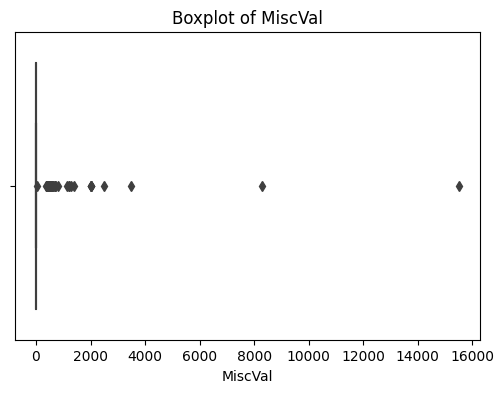

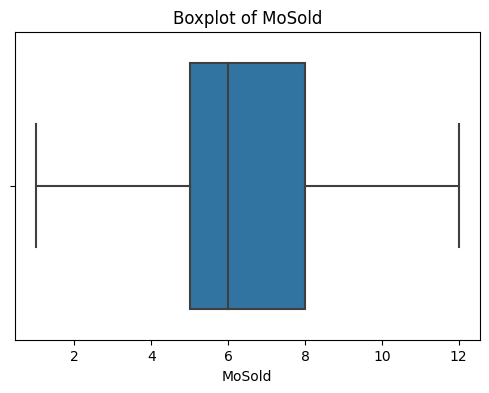

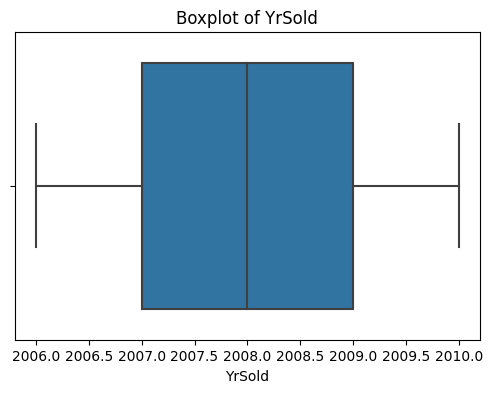

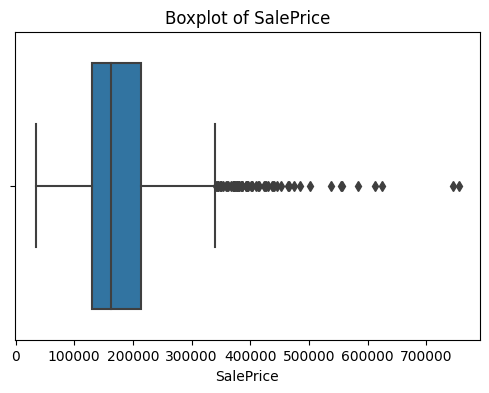

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))  # Set width to 6 inches, height to 4 inches
    sns.boxplot(data=df_train, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

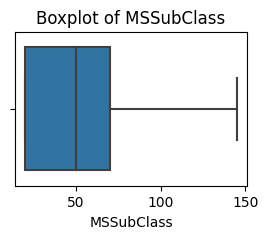

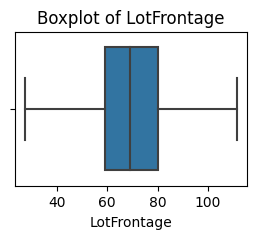

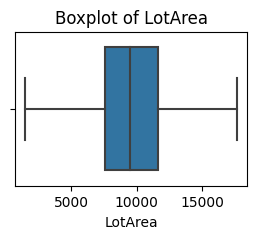

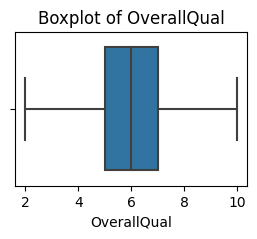

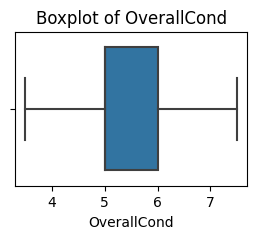

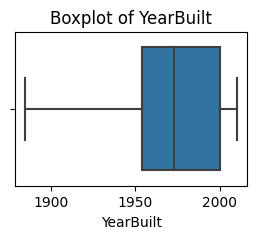

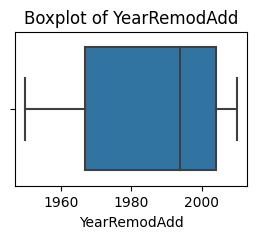

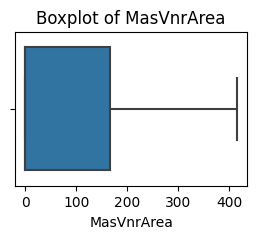

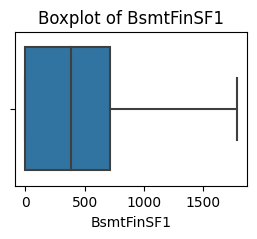

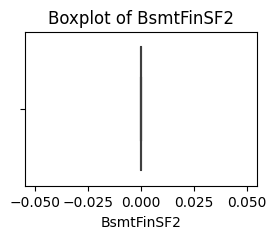

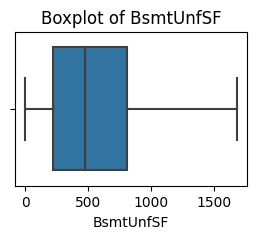

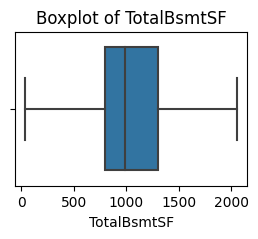

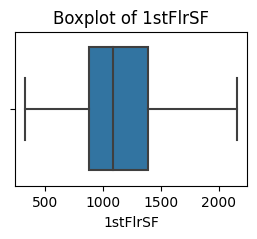

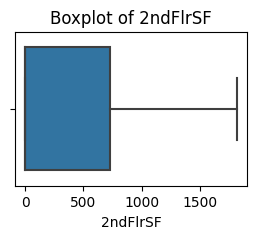

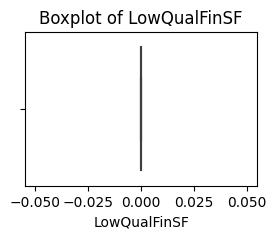

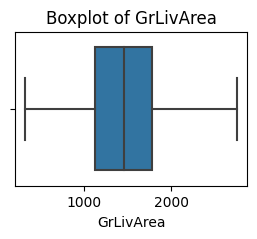

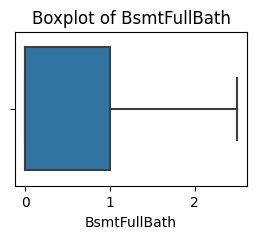

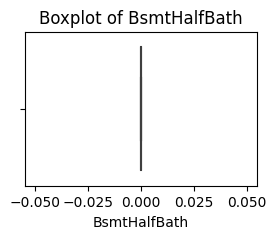

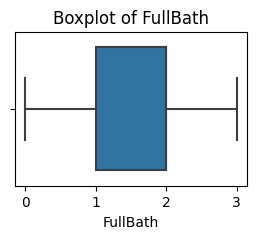

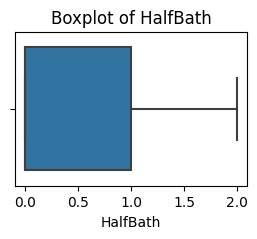

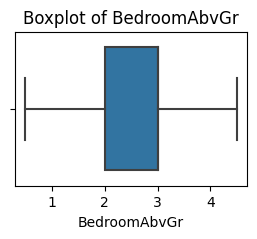

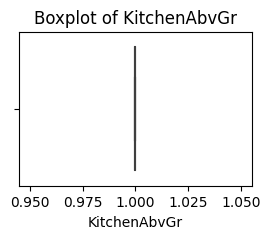

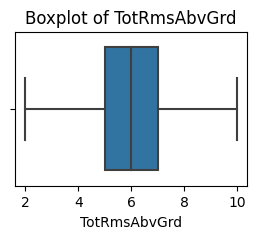

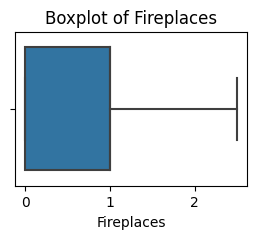

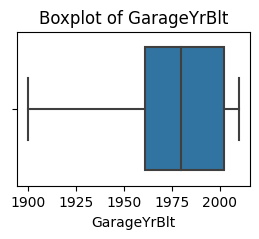

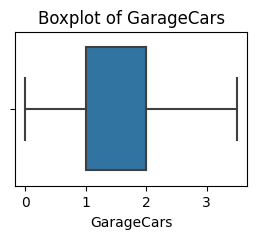

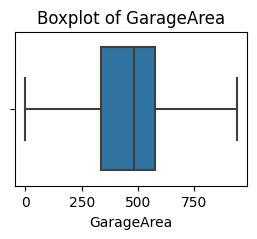

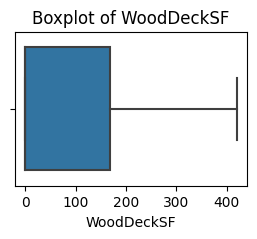

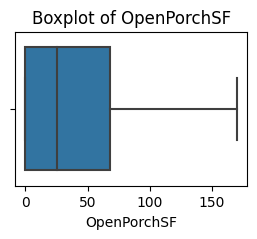

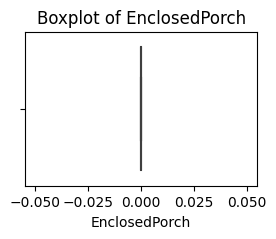

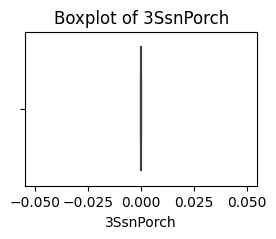

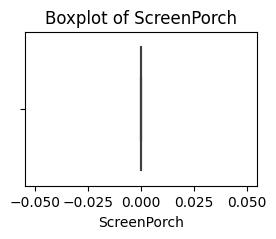

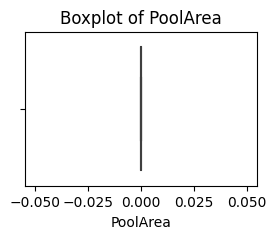

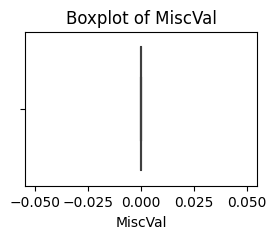

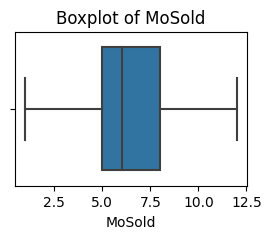

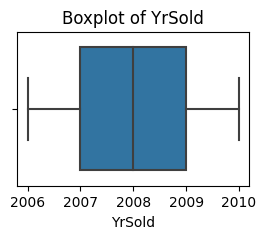

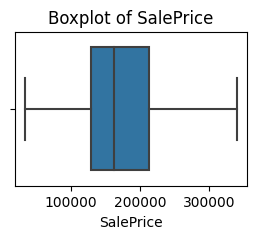

In [11]:
for col in numerical_columns:
    # Calculate IQR and identify potential outliers
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_train[col].clip(lower=lower_bound, upper=upper_bound, inplace=True)
    
for col in numerical_columns:
    plt.figure(figsize=(3, 2))
    sns.boxplot(data=df_train, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

In [12]:
#categorical_data
categorical_data = df_train.select_dtypes(include=['object'])

In [13]:
# handling categorical_data with label encoder 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Iterate through categorical columns in the extracted DataFrame and apply encoding
for col in categorical_data.columns:
    categorical_data[col] = le.fit_transform(categorical_data[col])

In [14]:
train = pd.concat([numerical_columns, categorical_data], axis = 1)
train = train.fillna(train.mean())

In [15]:
train.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,65.000000,8450,7,5,2003,2003,196.0,706,0,...,4,2,6,1,1,4,4,2,8,4
1,20,80.000000,9600,6,8,1976,1976,0.0,978,0,...,4,3,6,1,1,4,4,2,8,4
2,60,68.000000,11250,7,5,2001,2002,162.0,486,0,...,4,2,6,1,1,4,4,2,8,4
3,70,60.000000,9550,7,5,1915,1970,0.0,216,0,...,4,2,6,5,2,4,4,2,8,0
4,60,84.000000,14260,8,5,2000,2000,350.0,655,0,...,4,2,6,1,1,4,4,2,8,4
5,50,85.000000,14115,5,5,1993,1995,0.0,732,0,...,4,3,6,1,2,4,4,2,8,4
6,20,75.000000,10084,8,5,2004,2005,186.0,1369,0,...,4,2,6,1,1,4,4,2,8,4
7,60,70.049958,10382,7,6,1973,1973,240.0,859,32,...,4,3,6,1,1,4,4,2,8,4
8,50,51.000000,6120,7,5,1931,1950,0.0,0,0,...,1,3,2,5,2,1,4,2,8,0
9,190,50.000000,7420,5,6,1939,1950,0.0,851,0,...,4,3,6,1,1,2,4,2,8,4


## Remove the features Correlation than less than 60% with the target

In [16]:
corr = train.corr()
correlation=corr["SalePrice"].apply(abs).sort_values(ascending=False).reset_index()
threshold = 0.6

# Select columns with correlations above the threshold
columns_to_keep = correlation[correlation["SalePrice"] >= threshold]["index"].tolist()

# Drop columns not meeting the threshold
train = train[columns_to_keep]

print(train.shape)
train

(1460, 9)


,SalePrice,OverallQual,GrLivArea,GarageCars,ExterQual,GarageArea,BsmtQual,TotalBsmtSF,1stFlrSF
0,208500,7,1710,2,2,548,2,856,856
1,181500,6,1262,2,3,460,2,1262,1262
2,223500,7,1786,2,2,608,2,920,920
3,140000,7,1717,3,3,642,3,756,961
4,250000,8,2198,3,2,836,2,1145,1145
...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,3,460,2,953,953
1456,210000,6,2073,2,3,500,2,1542,2073
1457,266500,7,2340,1,0,252,3,1152,1188
1458,142125,5,1078,1,3,240,3,1078,1078


## Split and modeling 

In [17]:
X = train.drop("SalePrice", axis = 1)
y = train["SalePrice"]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=35)

In [19]:
# feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [21]:
# create and train LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# score for train 
print(f"train score: {model.score(X_train, y_train)}")
# score for test 
print(f"test score: {model.score(X_test, y_test)}")

train score: 0.7779906590883907
test score: 0.8094625763004825
